<a href="https://colab.research.google.com/github/RachelRamirez/misclassification_matrix/blob/main/30_Runs_of_Baseline_40D_with_SGD_LR_0point01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BLUF:  Learning Rate of 0.01  does not 'overfit' at epoch 110, meaning its STILL training at that time, so its too small of a static learning-rate to do multiple training cycles.  

In [51]:
# How to change the local time in Google Colab
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/US/Eastern /etc/localtime
!date

#If this doesn't show the local time correctly, then you need to restart.
import time
time.localtime(time.time())

Mon 01 May 2023 10:21:10 PM EDT


time.struct_time(tm_year=2023, tm_mon=5, tm_mday=1, tm_hour=22, tm_min=21, tm_sec=10, tm_wday=0, tm_yday=121, tm_isdst=1)

We'll start by writing a `.py` file which we'll import.

In [24]:
# import ImportLibraries_DefineFunctions
import requests
url = 'https://raw.githubusercontent.com/RachelRamirez/misclassification_matrix/main/ImportLibraries_DefineFunctions.py'
r = requests.get(url)


# make sure your filename is the same as how you want to import 
with open('ImportLibraries_DefineFunctions.py', 'w') as f:
    f.write(r.text)

# now we can import


In [34]:
# import ImportLibraries_DefineFunctions   #This didn't work for some reason so I do execfile() instead and that works

In [48]:
# #@title
# # Bring the file into the local Python environment.
execfile('ImportLibraries_DefineFunctions.py')

# Call the function defined in the file.
# f()
time.localtime(time.time())

Import Successful
TF version:  2.12.0
Keras version:  2.12.0
Finished Loading Libraries
60000 train samples
7500 validation samples
2500 test samples
Train [0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751666 0.09915   ]
Train # of 9s 5949.0
Train # of 4s 5842.0
Val [0.09586667 0.1132     0.10453334 0.10066666 0.09986667 0.09013333
 0.09413333 0.1016     0.09746667 0.10253333]
Val # of 9s 769.0
Val # of 4s 749.0
Test [0.1044 0.1144 0.0992 0.102  0.0932 0.0864 0.1008 0.1064 0.0972 0.096 ]
Test  # of 9s 240.0
Test  # of 4s 233.0


time.struct_time(tm_year=2023, tm_mon=5, tm_mday=1, tm_hour=22, tm_min=11, tm_sec=1, tm_wday=0, tm_yday=121, tm_isdst=1)

In [52]:
#@title
# #As of 4/18 I am changing this code to save weights initially after five epochs using lambdavalue=1 initially

# rms = RMSprop()  #https://keras.io/api/optimizers/rmsprop/ #default learning_rate=0.001
sgd = SGD(learning_rate=0.01)

patience = 0


# SET THE IITIAL LAMBDA VALUE! 
cost_matrix = np.ones((10,10))
lambda_val = 1

Truth=9
Predicted=4
cost_matrix[Truth, Predicted] = lambda_val


# # Define the per-epoch callback.
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix, )
# cr_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_classification_report, )
# es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights = True)





# ## Examples from TDS
# from tensorflow.keras.callbacks import LambdaCallback
# epoch_callback = LambdaCallback(
#     on_epoch_begin=lambda epoch,logs: print('Starting Epoch {}!'.format(epoch+1))
# )
# batch_loss_callback = LambdaCallback(
#     on_batch_end=lambda batch,logs: print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
# )
# train_finish_callback = LambdaCallback(
#     on_train_end=lambda logs: print('Training finished!')
# )

# # Lambda function using if else & else if
# min = lambda a, b, c : f"{a} is smaller" if(a < b & b < c) \
#      else f"{b} is smaller"  if (b < c) else f"{c} is smaller" 
# print(min(40, 30, 10))

epoch_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end = lambda epoch,logs: 
                                                   print(' Epoch {} modulus 10 is {}!'.format(epoch+1, (epoch+1)%10))  if(epoch+1)%10==0 else print("", end=" ")  )

# cr_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end= lambda epoch, logs:
# #                                                log_classification_report(epoch, logs) if(epoch+1)%5==0 else print(" ") )
#                                               #  return_cr if(epoch+1)%5==0 else print(" ") )


f1_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_f1_score)


model = create_model()

# save the model weights
model.save_weights('initial_0epochs.h5')



model.compile(loss=WeightedCategoricalCrossentropy(cost_matrix), optimizer=sgd,  metrics='categorical_accuracy',)

# model_history = model.fit(X_train, Y_train,  batch_size=batch_size, epochs=10, verbose=2,
#         validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True, callbacks = [ cm_callback, f1_callback])

# model.save_weights('initial_10epochs.h5')

# model.save_weights('initial_10epochs.h5')
# model.save_weights('baseline_for_100epochs.h5')

# save the model weights
# model.save_weights('initial_150epochs.h5')

 
# cr = return_cr(model)
!date


Mon 01 May 2023 10:21:33 PM EDT


The code below to generate variations of the model training / validation results after training with a cost matrix 30 times did not produce any variability.   Therefore I want to shuffle the training/validation deck randomly between training sessions to see if that helps introduce some randomness.  

#### The Training Runs - Commented out to ensure not run again when the notebook is saved with output

This takes hours to run for about 40 replications so usually after running, I save the out put to GitHub for easy lookup later

In [ ]:
#@title
from google.colab import files

## -----------------------------------------------------------------------------------------------------
## Now we need to load the weights of the model, and continue training with a different cost matrix
## ------------------------------------------------------------------------------------------------------
# load the model weights
# model.load_weights('initial_5epochs.h5') 


df = pd.DataFrame()
cost_matrix = np.ones((10,10))

model_history_all = []
cm_all            = []

# cost_list = [10, 100, 1000, 1] # Each one takes about 2 minutes 5*4*2=40 minutes for 5 costs/4 reps -- actually all took 40 reps took almost  1.5 hours
cost_list = [1] # Each one takes about 2 minutes 5*4*2=40 minutes for 5 costs/4 reps -- actually all took 40 reps took almost  1.5 hours
reps = 30

for k in cost_list:
  for i in range(reps):
    print("starting rep ", i, " for ", k , "-cost.")

    cost_matrix[9,4] = k
    model = create_model()

    # model.load_weights('initial_10epochs.h5')

    #I may need to re-initiate the optimizer to have a smaller learning rate
    model.compile(loss=WeightedCategoricalCrossentropy(cost_matrix), optimizer=sgd,  metrics='categorical_accuracy',)
    
    nb_epoch = 110
    # patience = 20

    # es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights = True)

    X_train_shuffled = shuffle(X_train, random_state=42+i)
    Y_train_shuffled = shuffle(Y_train, random_state=42+i)
 

    history = model.fit(X_train_shuffled, Y_train_shuffled,          batch_size=batch_size, epochs=nb_epoch, verbose=0,
            validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True, callbacks = [ cm_callback, f1_callback, epoch_callback])

    cm3 = return_cm(model)

    del(history.model)
    model_history_all.append(history)
    cm_all.append(cm3)
    ## Now I need to plot all of the "model_history_all"

    df = pd.concat([df, pd.DataFrame({"cost": k, "rep": i,
                                      "model_history": [history],
                                      "cm": [cm3]]
                                      })] , 
                   ignore_index=True )

    import pickle

    # save the variable to a pickle file
    with open('baseline_models_lr01.pkl', 'wb') as f:
        pickle.dump(model_history_all, f)

    files.download('baseline_models_lr01.pkl')

    with open('baseline_cms_lr01.pkl', 'wb') as f:
        pickle.dump(cm_all, f)

    files.download('baseline_cms_lr01.pkl')
    !date




  # print(model_history_all) #18 items into _ is taking 1 hours and 3 minutes!  perhaps im not usng the right settings - i have no-accelerator on google colab

#### Download the multiple runs and reps of Model History from training with different lambda values


Also commented out because once everything is ran and saved, I don't want to accidentally save additional files

#### Load Model History Variables from Pickle Files - must have weighted-categorical-accuracy defined

In [11]:
#Upload and save the history to variable 
import pickle

# #load the pickle file
with open('baseline_models_lr01 (6).pkl', 'rb') as handle:
    model_history_all = pickle.load(handle)

# import keras
# keras.models.load_model('initial_10_secondphase_lambda_history.pkl')
#use the loaded variable
print(model_history_all)

# #load the pickle file
with open('baseline_cms_lr01 (12).pkl', 'rb') as handle:
    cm_all = pickle.load(handle)

# use the loaded variable
print(cm_all)

 

[<keras.callbacks.History object at 0x7f1619ea9d20>, <keras.callbacks.History object at 0x7f159c037550>, <keras.callbacks.History object at 0x7f159c086830>, <keras.callbacks.History object at 0x7f159c0ddd20>, <keras.callbacks.History object at 0x7f15922b9210>, <keras.callbacks.History object at 0x7f159230c700>, <keras.callbacks.History object at 0x7f1592357bb0>, <keras.callbacks.History object at 0x7f15921af0a0>, <keras.callbacks.History object at 0x7f1592202590>, <keras.callbacks.History object at 0x7f1592261a80>, <keras.callbacks.History object at 0x7f15920b8f70>, <keras.callbacks.History object at 0x7f1592110460>, <keras.callbacks.History object at 0x7f159215b910>, <keras.callbacks.History object at 0x7f1591fb2e00>]
[     0    1    2    3    4    5    6    7    8    9
0  709    0    1    0    0    2    5    1    1    0
1    0  834    3    3    0    1    3    1    4    0
2    4    2  748    4    5    0    5    9    7    0
3    0    1   10  719    1    8    0   11    5    0
4    1    

#### Example of how to concatenate multiple dataframes without causing an error.  Have to use pandas concatenate function.

In [ ]:
#@title
import pandas as pd

# Create an empty dataframe
df = pd.DataFrame()

# Create a list of data
data = [1, 2, 3, 4, 5]

# Use a for loop to fill the dataframe
for x in data:
    df = pd.concat([df, pd.DataFrame({'Number':[x], 'Square':[x**2]})], ignore_index=True)

# Show the dataframe
print(df)

#### Loading the data into a Dataframe to be saved as a CSV file

In [13]:
#I want to break out the model_history and cm_history into a dataframe to be referenced by Cost and Rep
import pandas as pd
df = pd.DataFrame()
count=1


#It'd be better if i could refer to the "cost"/lambda2 as a variable in the model_history, 
# but i recreated it here
# 
# cost_list = [10, 100, 1000, 1] # Each one takes about 2 minutes 5*4*2=40 minutes for 5 costs/4 reps -- actually all took 40 reps took almost  1.5 hours

cost_list = [1]

for k in cost_list:

  
#It'd be better if i could refer to the reps a variable in the model_history, 
# but i recreated it here as the range(10) that was originally used

  for i in range(len(model_history_all)):
    # print("k: ", k, "i: ", i)
    df = pd.concat([df, pd.DataFrame({"cost": [k], "rep": [i],
                                      "model_history": [model_history_all[i]],
                                      # "cm": [cm_all[count-1]]
                                      })] , 
                   ignore_index=True )
    count+=1    


# I create a dataframe with CSV but  don't save/download it 
df.to_csv('dataframe.csv',index=False)



In [10]:
# #I want to add the 50 epochs i did of lambda1 = 1 using SGD to this list

# df = pd.concat([df, pd.DataFrame({"cost": 1, "rep": 1,
#                                       "model_history": [model_history],
#                                       # "cm": [cm_all[count-1]]
#                                       })] , 
#                    ignore_index=True )

##### Example of using df.groupby in a for loop to plot multiple types of data - doesn't include Label
```
for group in df.groupby("cost"): 
  fig = plt.figure(figsize=(20, 10))  
  fig, ax = plt.subplots(1,2) 
  ax[0].scatter(group[1]["cost"], group[1]["quantity"]) 
  ax[0].set_title("cost vs. quantity") 
  ax[1].scatter(group[1]["cost"], group[1]["revenue"]) 
  ax[1].set_title("cost vs. revenue")
  plt.show()

```


Group of Lambda-Value: 1


ImportLibraries_DefineFunctions.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(20, 10))


<Figure size 2000x1000 with 0 Axes>

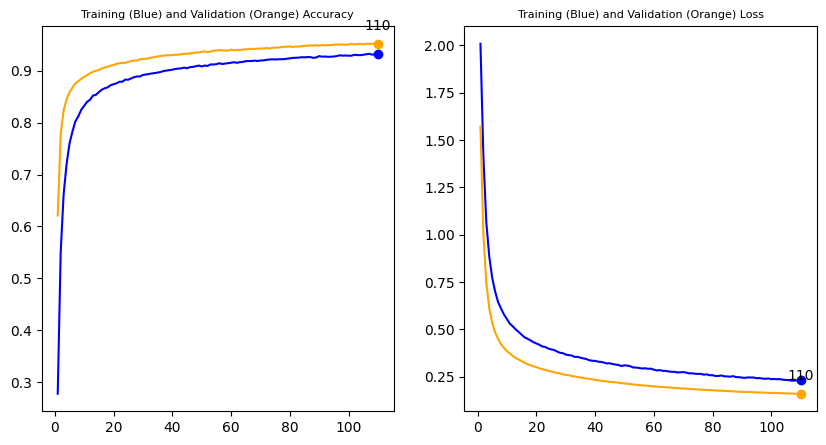

<Figure size 2000x1000 with 0 Axes>

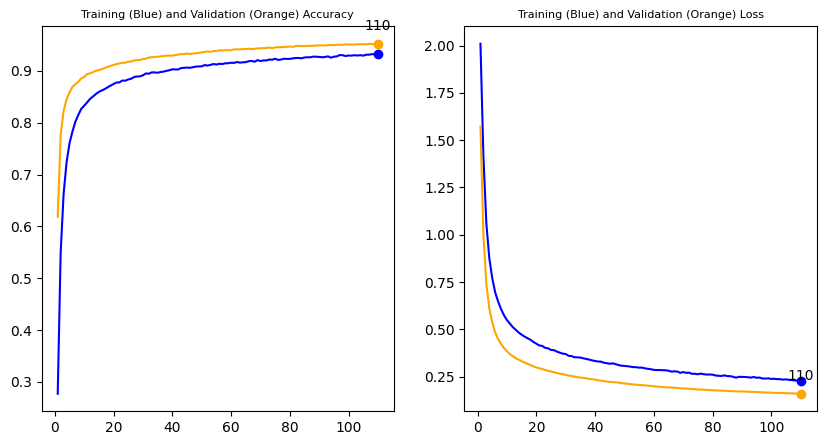

<Figure size 2000x1000 with 0 Axes>

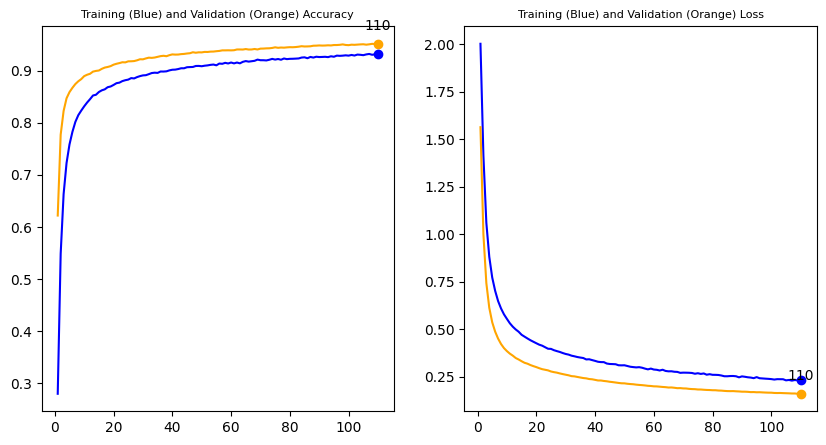

<Figure size 2000x1000 with 0 Axes>

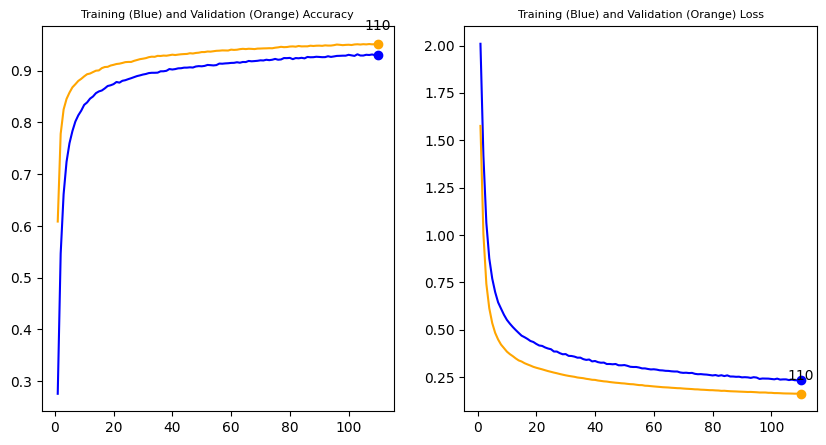

<Figure size 2000x1000 with 0 Axes>

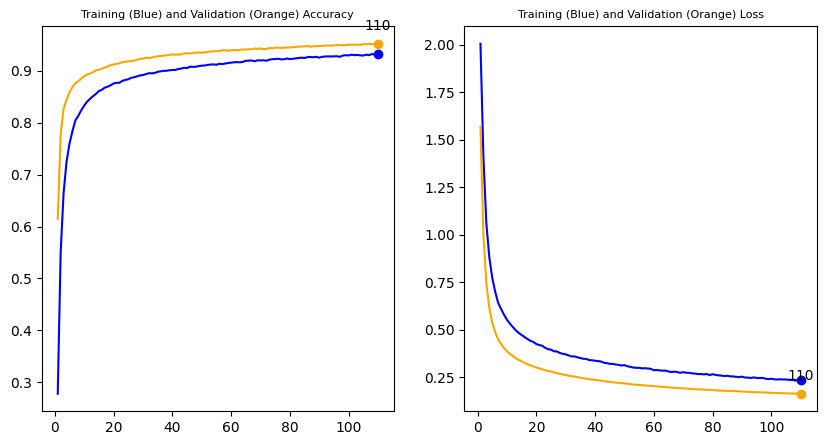

<Figure size 2000x1000 with 0 Axes>

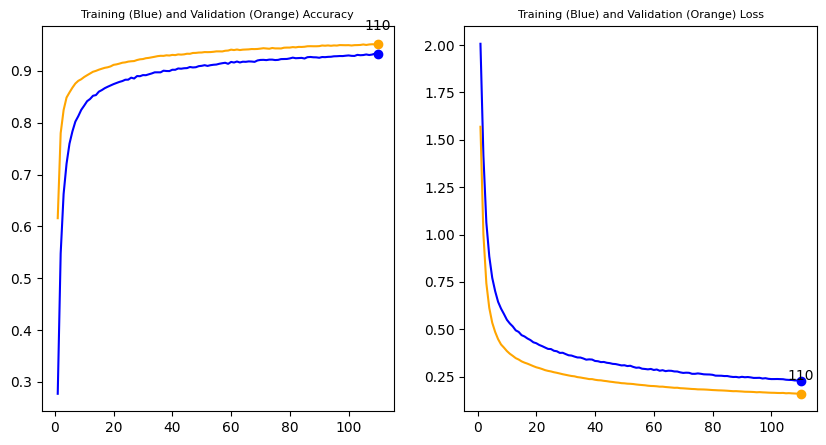

<Figure size 2000x1000 with 0 Axes>

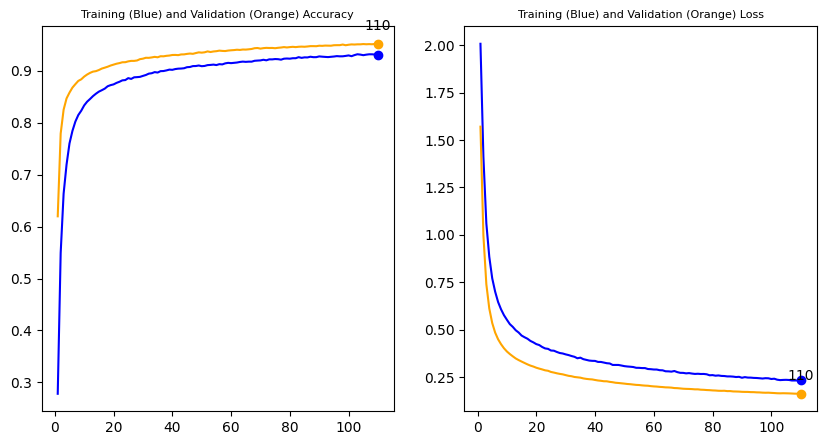

<Figure size 2000x1000 with 0 Axes>

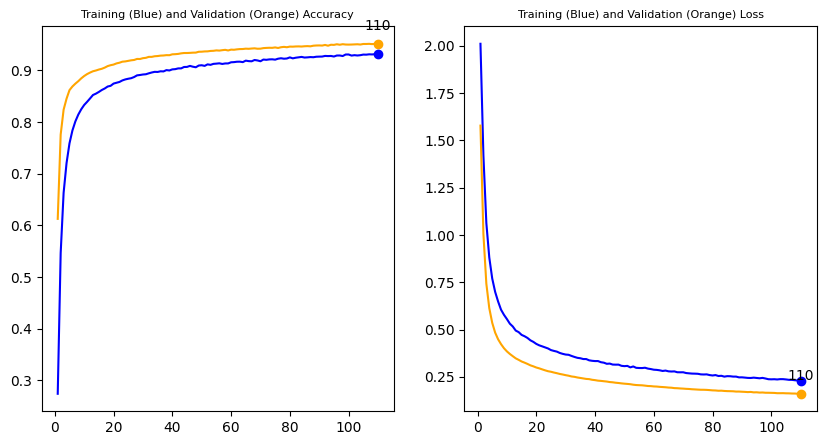

<Figure size 2000x1000 with 0 Axes>

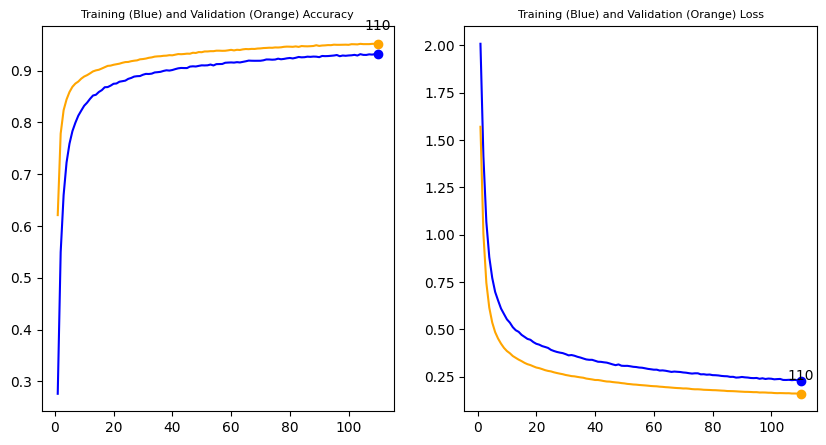

<Figure size 2000x1000 with 0 Axes>

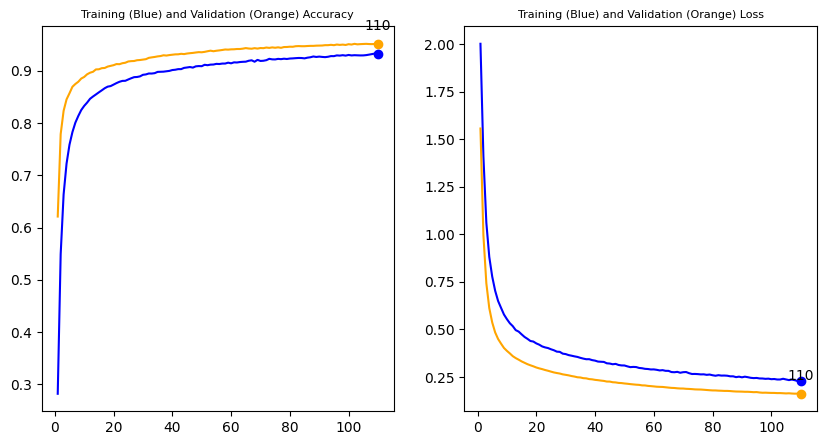

<Figure size 2000x1000 with 0 Axes>

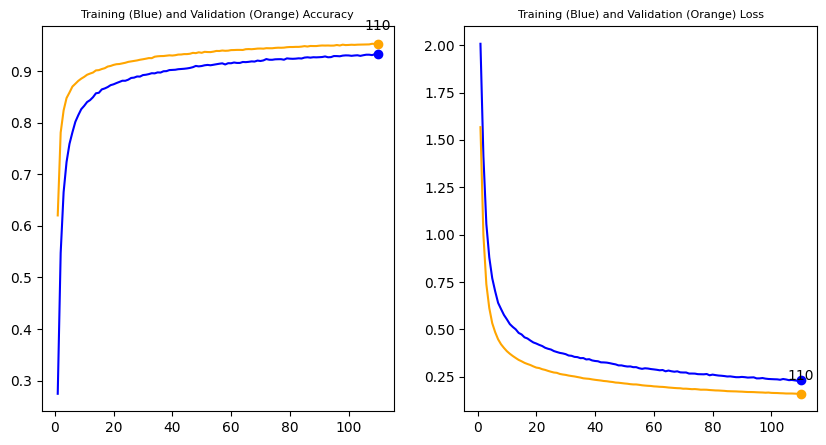

<Figure size 2000x1000 with 0 Axes>

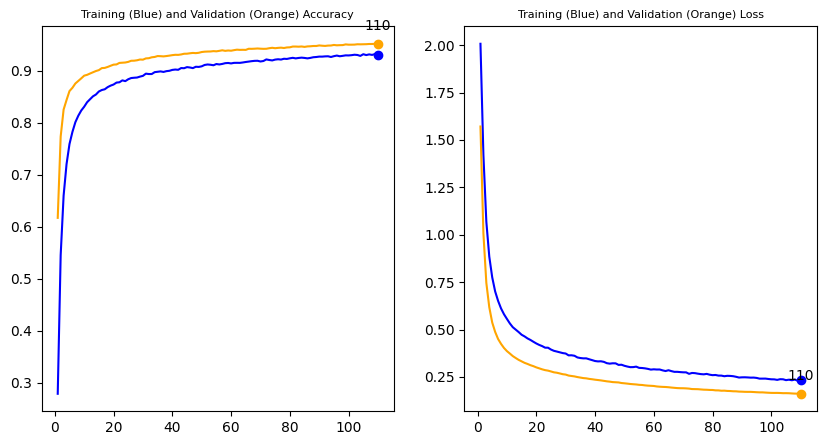

<Figure size 2000x1000 with 0 Axes>

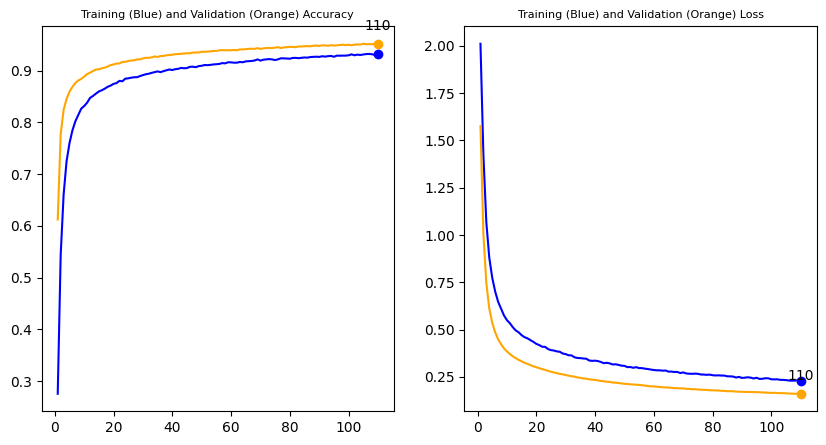

<Figure size 2000x1000 with 0 Axes>

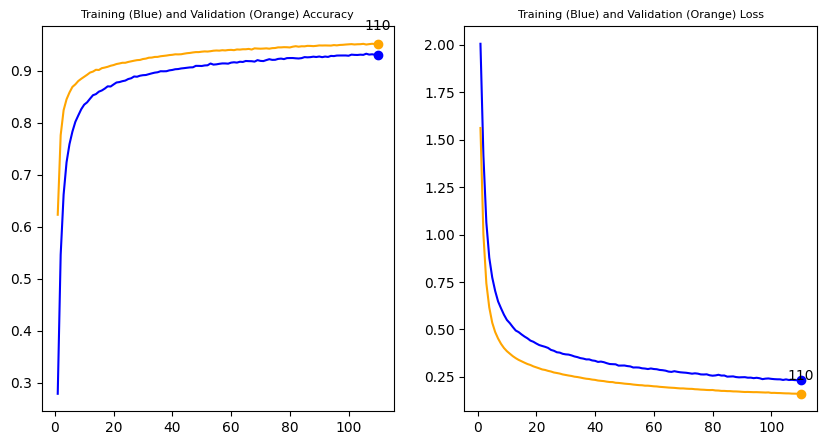

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import time
nb_epoch = 50
patience = 0
df.groupby("cost")

for x, group in df.groupby("cost"):
  # fig = plt.figure(figsize=(20, 10)) 
  # fig, ax = plt.subplots(1,2)
  print("Group of Lambda-Value:",   x)

  # group
  for item in group.model_history:
    plot_model_history_all(item)    
  plt.show()
    # for item, cm3 in zip(group.model_history, group.cm):

  #   # cm3_wodiag = cm3*(np.ones((10,10)) - np.eye(10))

  #   # ax[2] = sns.heatmap(cm3_wodiag, annot=True, annot_kws={"size": 7},  fmt='g', cmap=sns.cm.rocket_r, cbar=False) # font size
  #   # ax[2].set_xlabel('Predicted Class')
  #   # ax[2].set_ylabel('True Class')
  #   # ax[2].set_title('# of misclassifications of 9 as 4 is '+str(cm3[4][9]))
  #   # cbar = ax[2].collections[0].colorbar
  #   # cbar.remove() # Just takes up valuable room and is worthless
  #   plot_model_history_all(item)    

  #   #   ax[0].set_title("Lambda Value of"+str(df["cost"]))
    
  # #   # print(0+r,' to ', r+4+1)  #Correct

In [91]:
# for item, cm3 in zip(group.model_history, group.cm):

#     cm3_wodiag = cm3*(np.ones((10,10)) - np.eye(10))

#     ax[2] = sns.heatmap(cm3_wodiag, annot=True, annot_kws={"size": 7},  fmt='g', cmap=sns.cm.rocket_r, cbar=False) # font size
#     ax[2].set_xlabel('Predicted Class')
#     ax[2].set_ylabel('True Class')
#     ax[2].set_title('# of misclassifications of 9 as 4 is '+str(cm3[4][9]))
#     cbar = ax[2].collections[0].colorbar
#     cbar.remove() # Just takes up valuable room and is worthless
#     plot_model_history_all(item)    

#     #   ax[0].set_title("Lambda Value of"+str(df["cost"]))
    
#   #   # print(0+r,' to ', r+4+1)  #Correct

AttributeError: ignored

In [93]:
df["model_history"][0].history.keys()
# The last run captured is "13" for the 14th run

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', '9T_4P', '4T_9P', '0T_Acc', '1T_Acc', '2T_Acc', '3T_Acc', '4T_Acc', '5T_Acc', '6T_Acc', '7T_Acc', '8T_Acc', '9T_Acc', 'cm_per_epoch', 'f1_micro', 'f1_macro', 'f1_weighted', 'f1_notweighted'])

The plots of the 14 (15?) completed runs look very similar.  The loss values, even with shuffling, are nearly identical at least within 0.01 for the first three epochs of runs 1 and 2 (haven't checked all, but the plot makes it look like the runs are nearly identical)

In [69]:
df["model_history"][2].history["val_loss"][0] - df["model_history"][1].history["val_loss"][0]
df["model_history"][2].history["val_loss"][1] - df["model_history"][1].history["val_loss"][1]
df["model_history"][2].history["val_loss"][2] - df["model_history"][1].history["val_loss"][2]

0.0016095638275146484

What is clear however is there doesn't seem to be any overfitting with the small learning rate, and that training could probably continue for another 20 epochs or more.

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns


What is the highest misclassification?



0


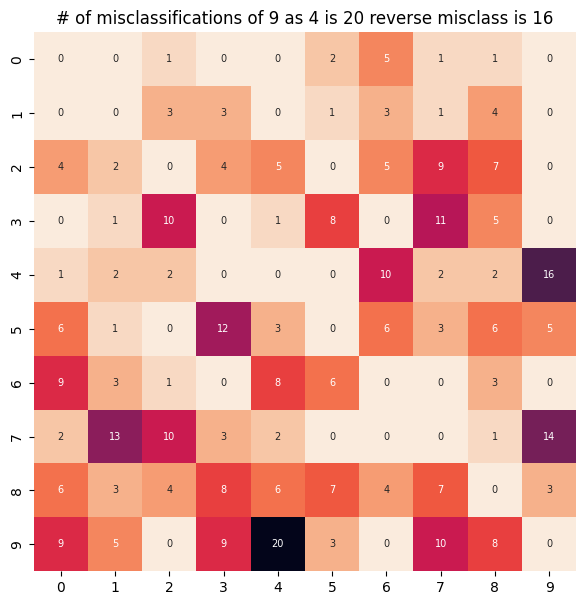

1


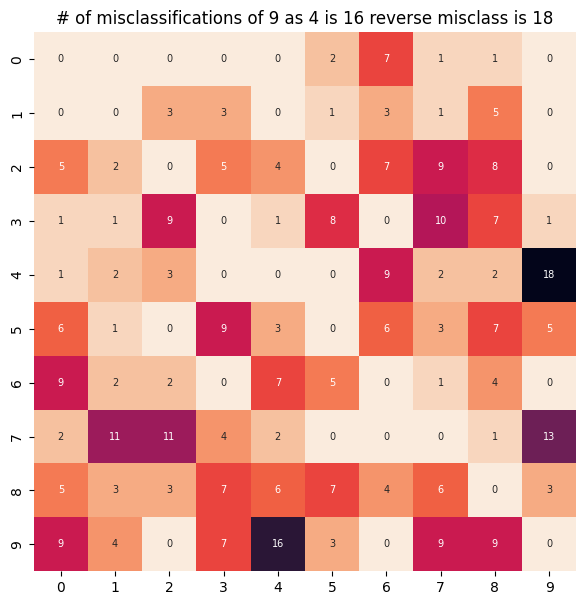

2


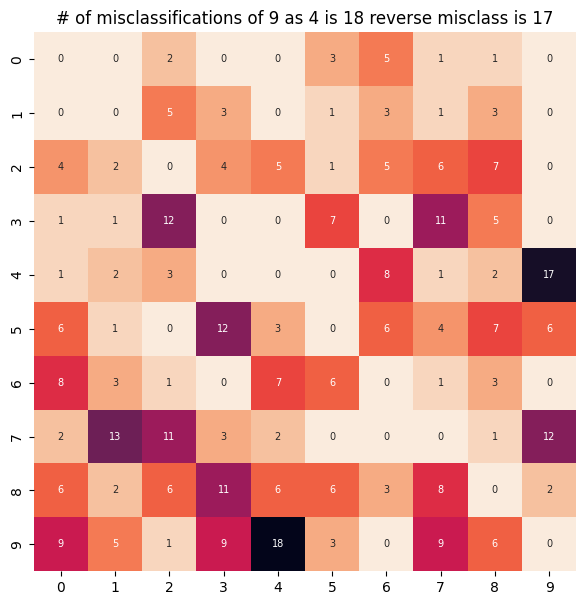

3


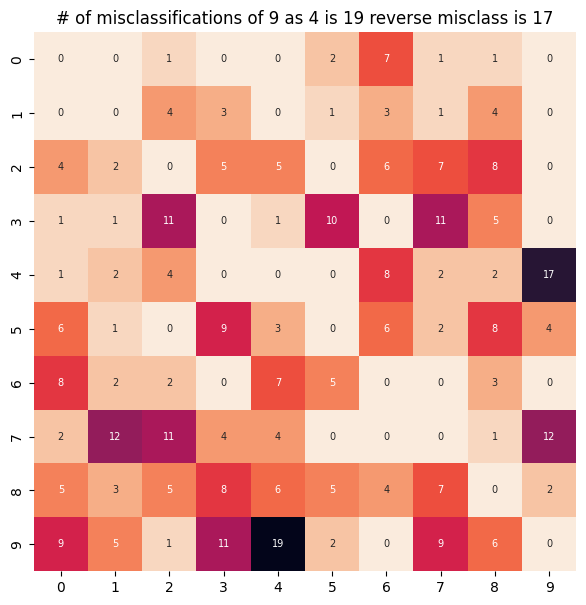

4


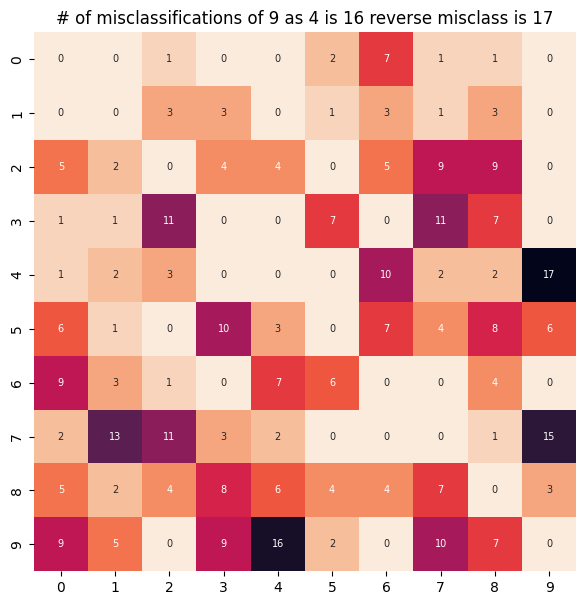

5


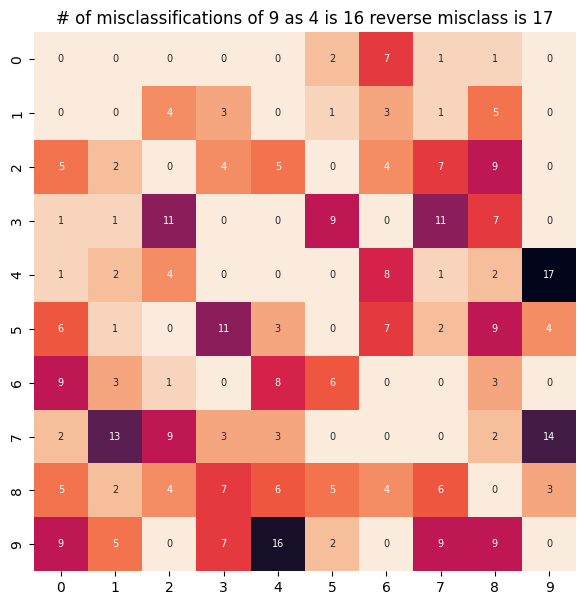

6


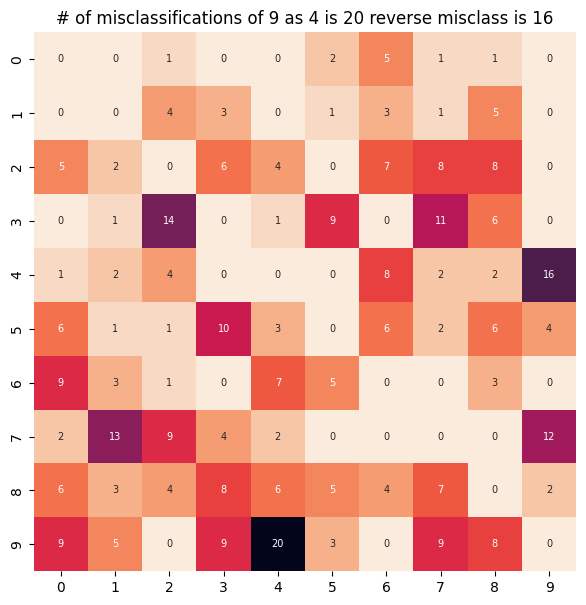

7


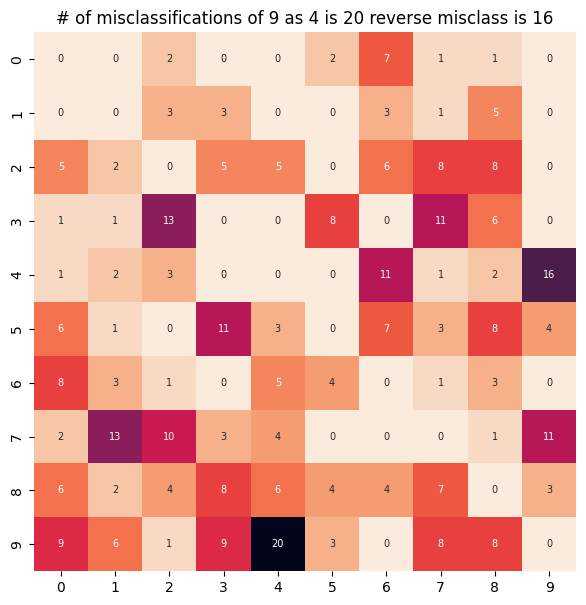

8


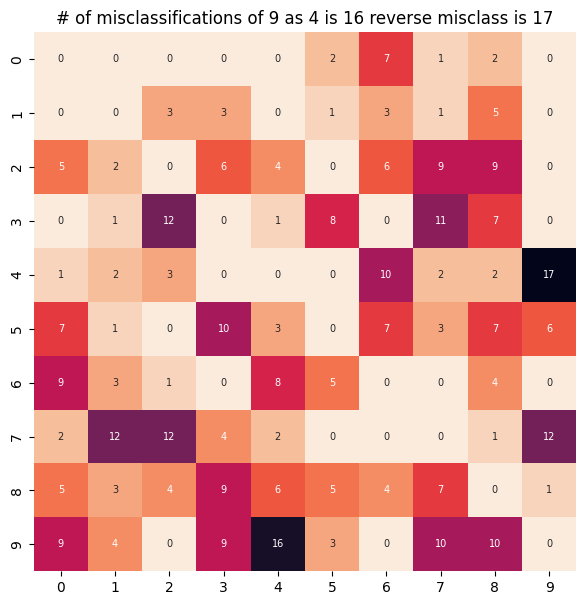

9


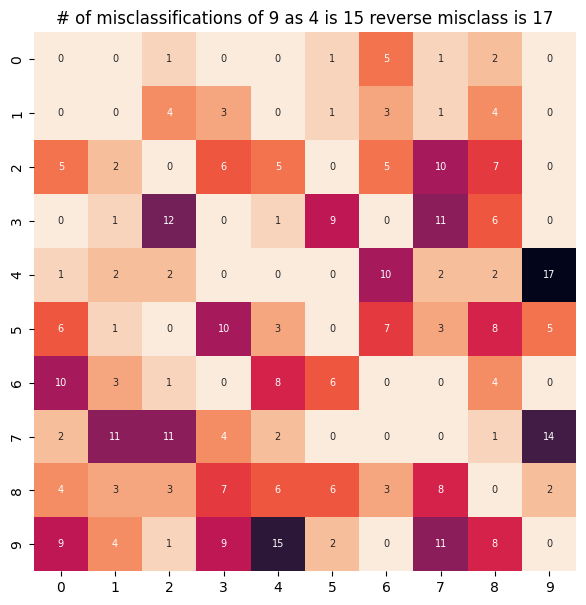

10


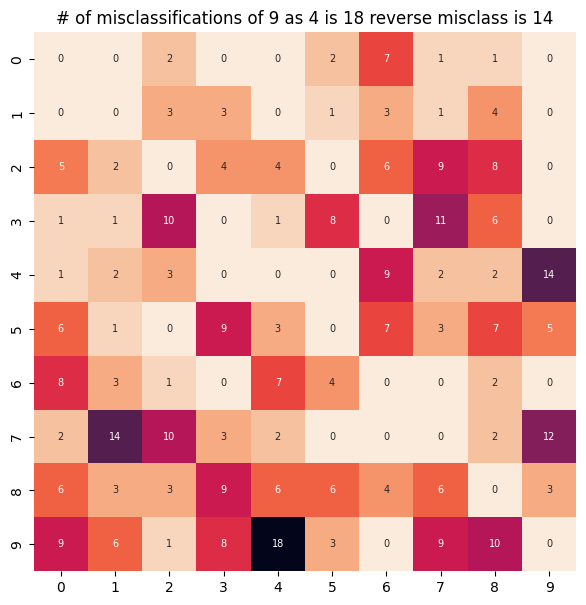

11


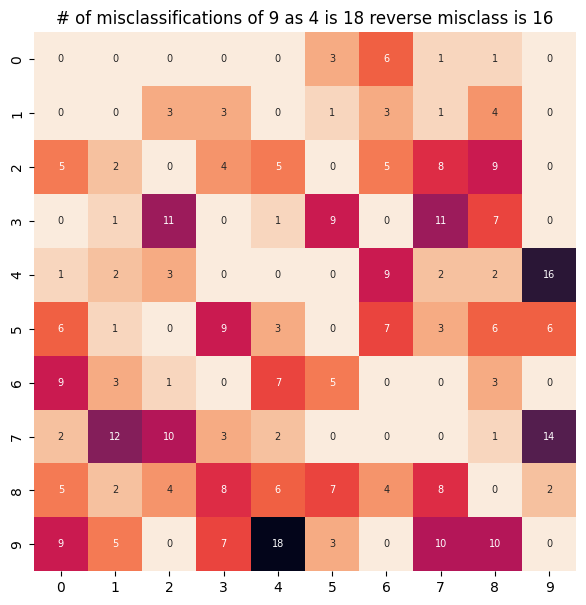

12


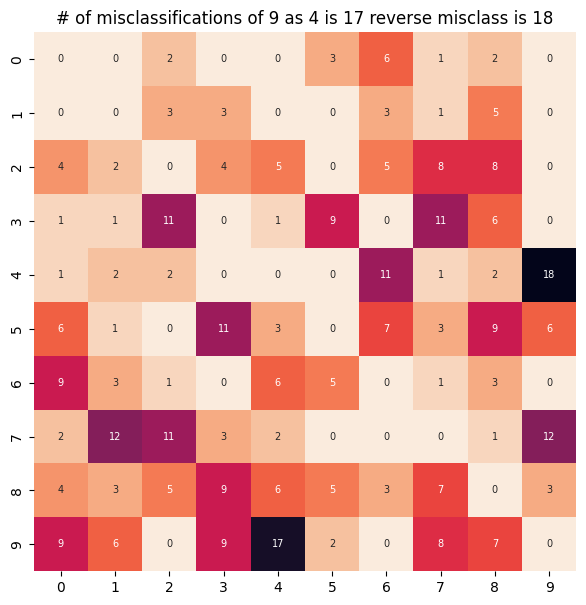

13


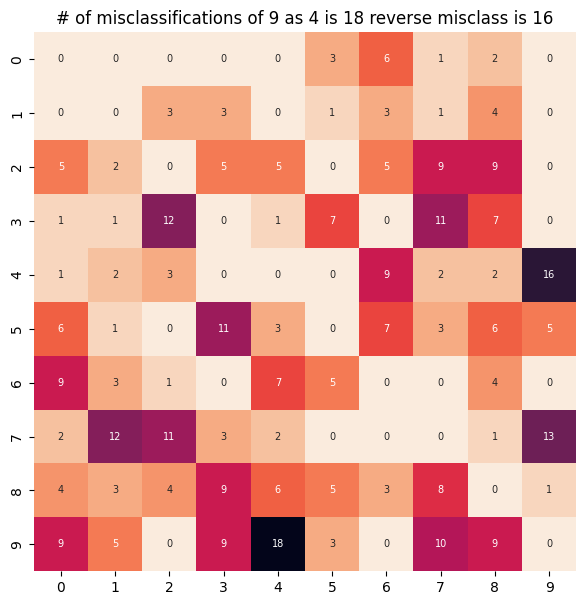

In [117]:
for i in range(len(df["model_history"])):
  print(i)
  cm = df["model_history"][i].history["cm_per_epoch"][-1].reshape((10,10))
  # cm = cm.reshape((10,10))
  

  # Create figure and axes
  fig, ax = plt.subplots(figsize=(7, 7))


  cm3_wodiag = pd.DataFrame(cm*(np.ones((10,10)) - np.eye(10)))
  plt.xlabel('Predicted Class')
  plt.ylabel('True Class')
  plt.title('# of misclassifications of 9 as 4 is '+str(cm[9][4]) + ' reverse misclass is ' + str(cm[4][9])  ) 
  sns.heatmap(cm3_wodiag, annot=True, annot_kws={"size": 7},  fmt='g', cmap=sns.cm.rocket_r, cbar=False) # font size
  plt.show()




  
  

ImportLibraries_DefineFunctions.py:187: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(20, 10)) # I don't think this works for some reason


<Figure size 2000x1000 with 0 Axes>

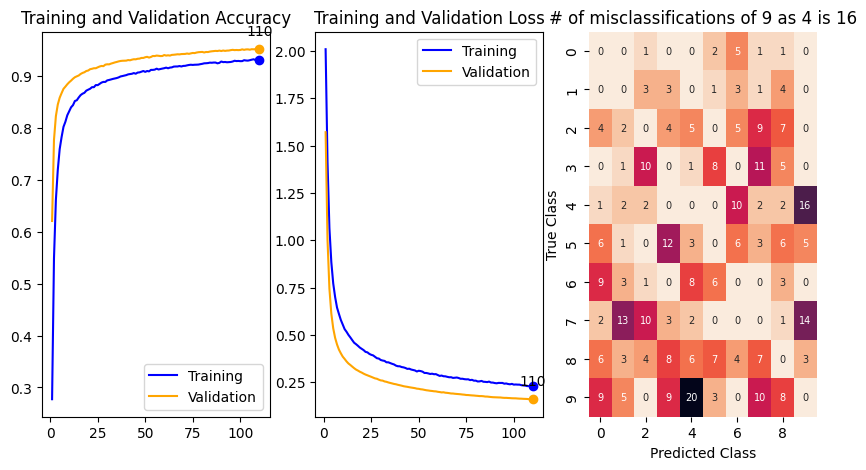

<Figure size 2000x1000 with 0 Axes>

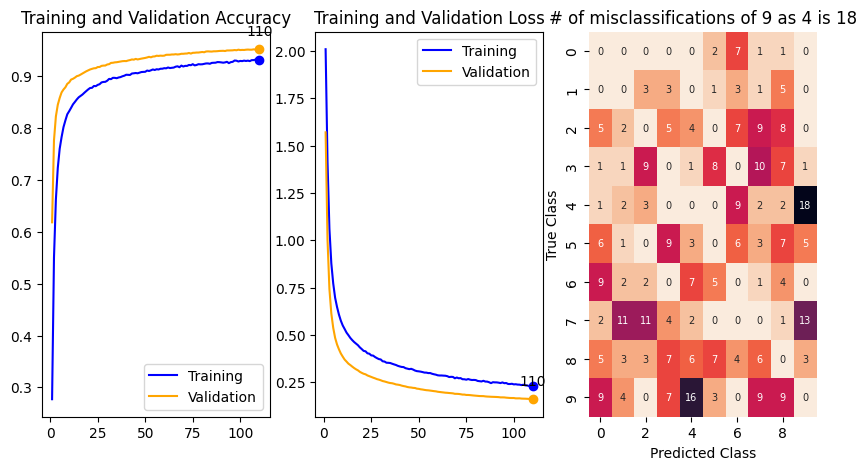

<Figure size 2000x1000 with 0 Axes>

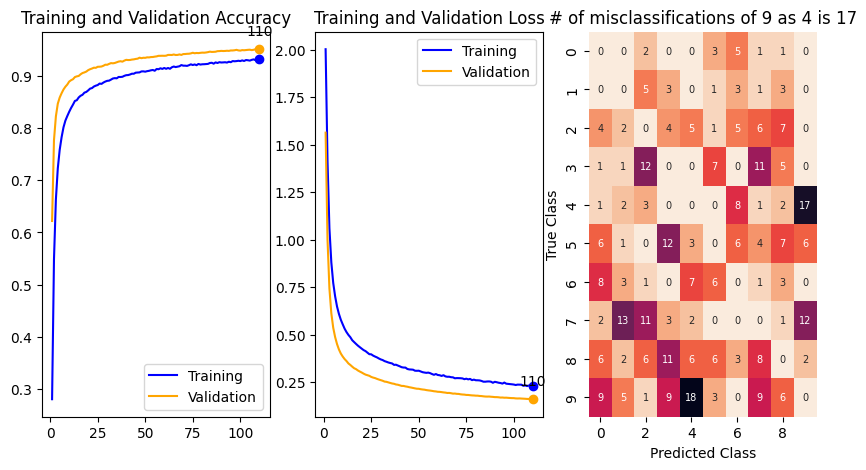

<Figure size 2000x1000 with 0 Axes>

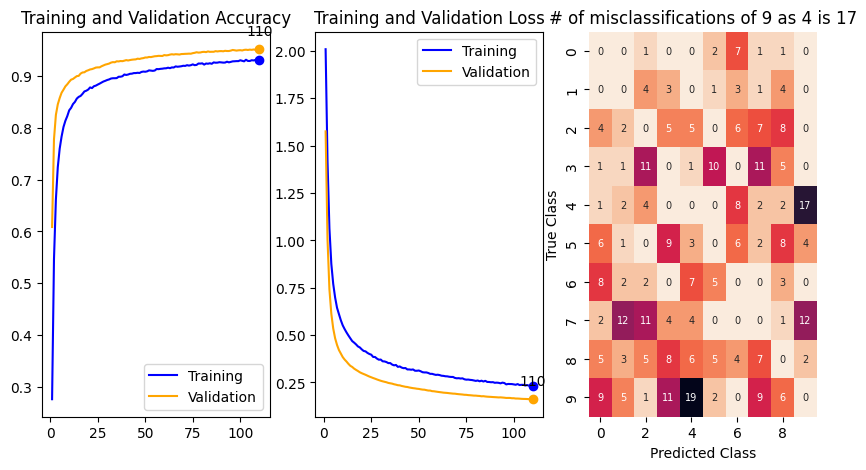

<Figure size 2000x1000 with 0 Axes>

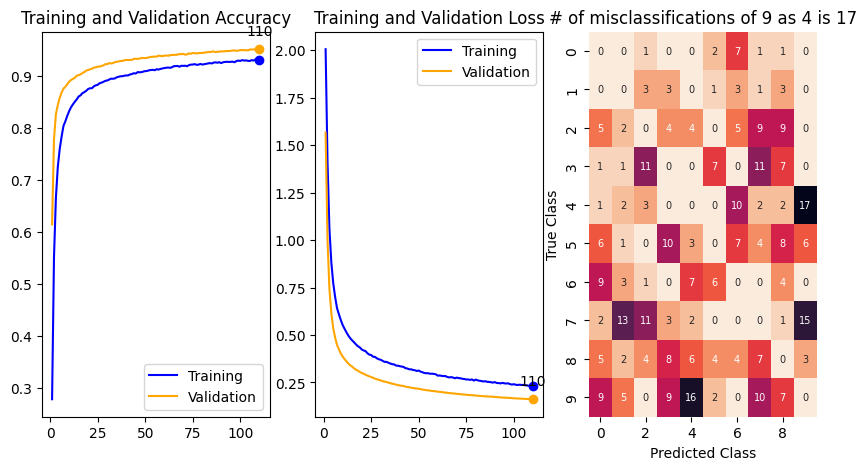

<Figure size 2000x1000 with 0 Axes>

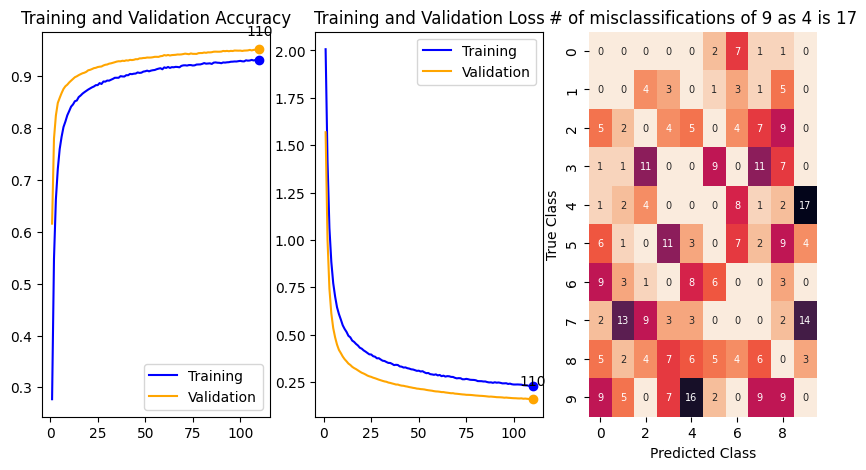

<Figure size 2000x1000 with 0 Axes>

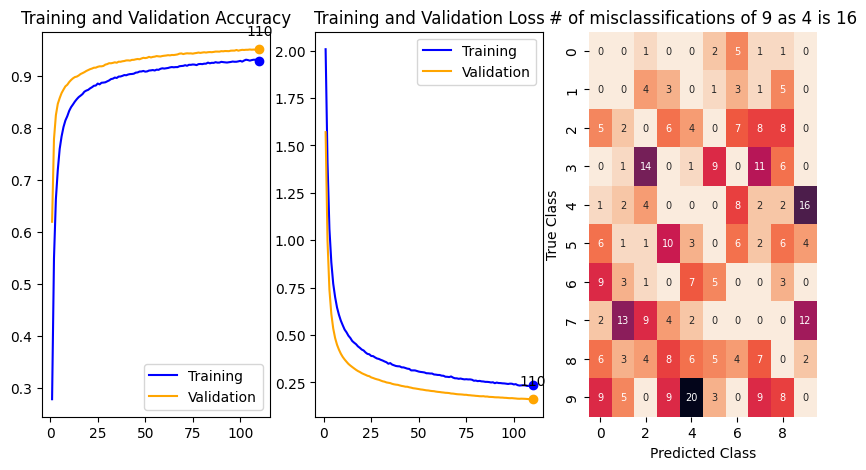

<Figure size 2000x1000 with 0 Axes>

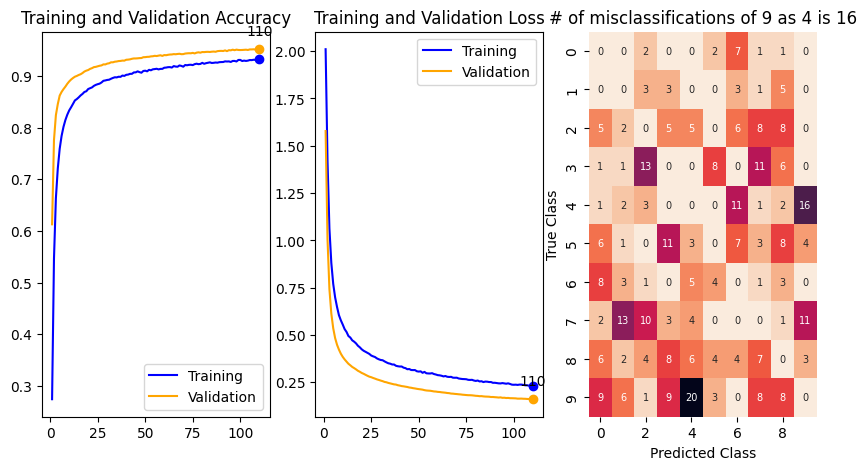

<Figure size 2000x1000 with 0 Axes>

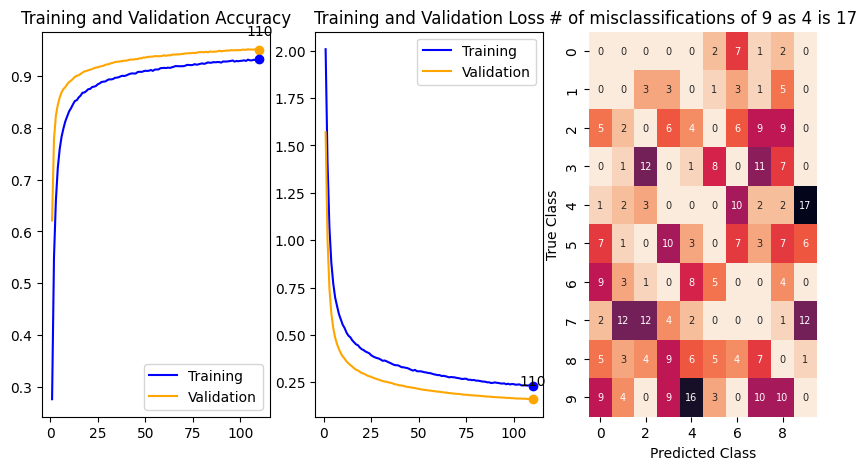

<Figure size 2000x1000 with 0 Axes>

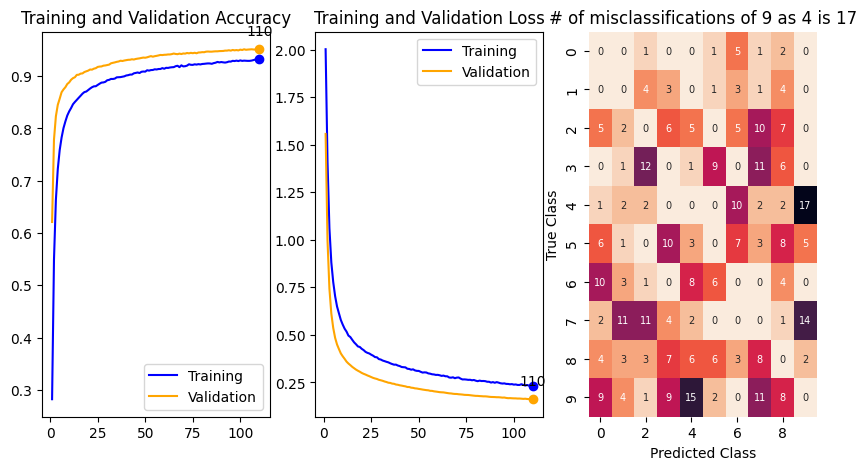

<Figure size 2000x1000 with 0 Axes>

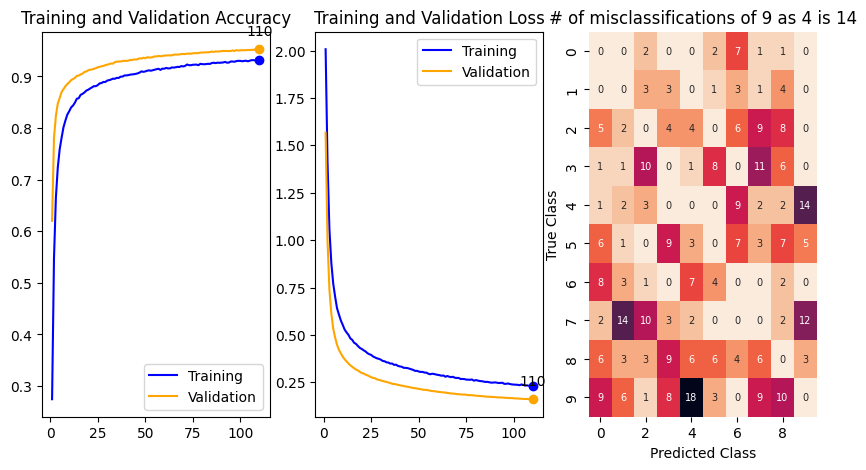

<Figure size 2000x1000 with 0 Axes>

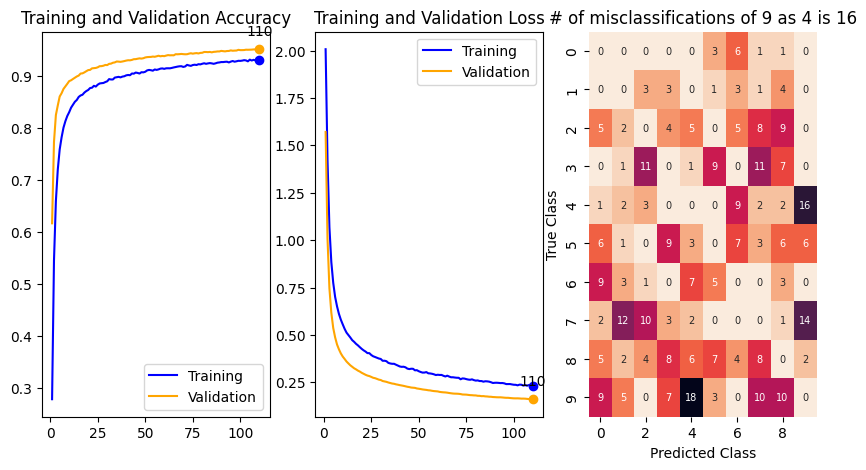

<Figure size 2000x1000 with 0 Axes>

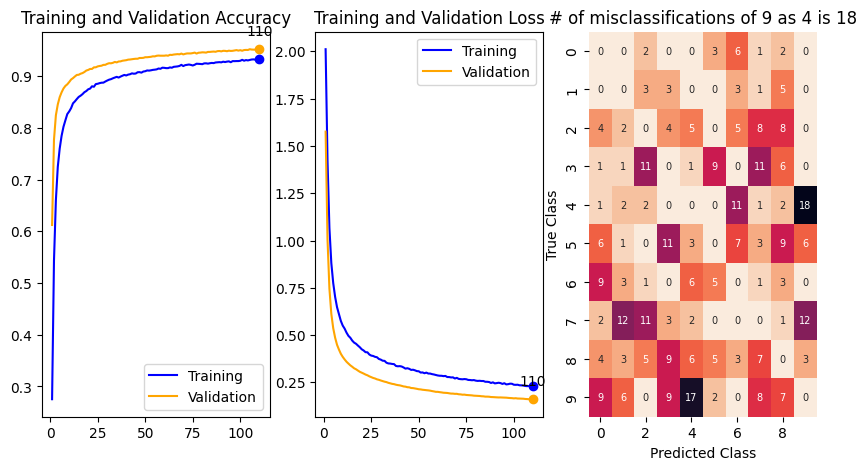

<Figure size 2000x1000 with 0 Axes>

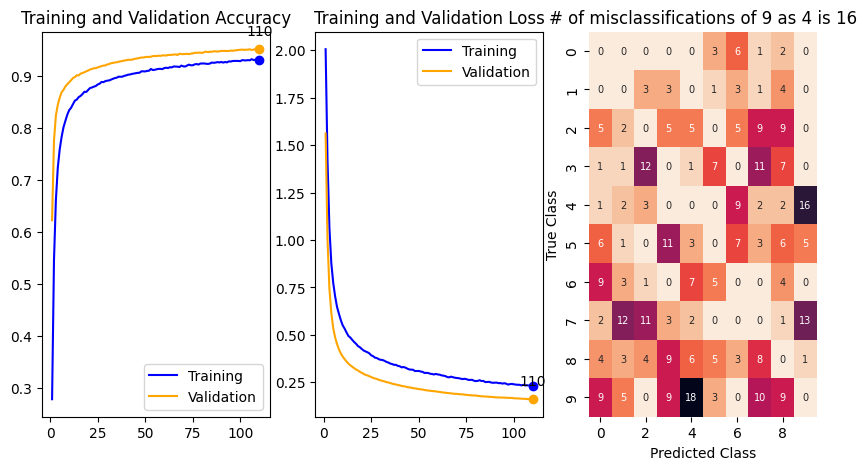

In [124]:
for i in range(len(df["model_history"])):
  plot_model_history(df["model_history"][i], 110, df["model_history"][i].history["cm_per_epoch"][-1].reshape((10,10)))

  plt.gcf().set_size_inches(10, 5)  # this works 
  # plt.gcf().suptitle(f"Lambda Value {lambda_val} for {nb_epoch} Epochs and Patience {patience} " )

  



